In [1]:
library(class)
library(tidyquant)

data(iris)
head(iris)
summary(iris)
library(quantmod)

Loading required package: lubridate
Warning message:
"package 'lubridate' was built under R version 3.4.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: PerformanceAnalytics
Warning message:
"package 'PerformanceAnalytics' was built under R version 3.4.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend

Loading required package: quantmod
Warning message:
"package 'quantmod' was built under R version 3.4.3"Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
Loading required package: tidyverse
Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggp

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [2]:
library(quantmod)

In [3]:
train = iris[c(1:30,51:80,101:130),1:5]
test = iris[c(31:50,81:100,131:150),1:5]

In [7]:
head(train)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [8]:
pred = knn(train[,1:4], test[,1:4], train[,5], k = 3)
# display the confusion matrix
table(pred,test[,5])

            
pred         setosa versicolor virginica
  setosa         20          0         0
  versicolor      0         19         0
  virginica       0          1        20

In [10]:
# 5-fold cross-validation to select k
# from the set {1,...,10}
fold = sample(rep(1:5,each=18)) # creation des groupes B_v
cvpred = matrix(NA,nrow=90,ncol=10) # initialisation de la matrice
# des prédicteurs
for (k in 1:10)
for (v in 1:5)
{
sample1 = train[which(fold!=v),1:4]
sample2 = train[which(fold==v),1:4]
class1 = train[which(fold!=v),5]
cvpred[which(fold==v),k] = knn(sample1,sample2,class1,k=k)
}
class = as.numeric(train[,5])
# display misclassification rates for k=1:10
apply(cvpred,2,function(x) sum(class!=x)) # calcule l'erreur de classif.

[1] 5 7 4 6 5 7 4 3 4 3

In [11]:
library(DMwR)
data(GSPC)

Loading required package: lattice
Loading required package: grid


In [12]:
head(GSPC)

            Open  High   Low Close   Volume Adjusted
1970-01-02 92.06 93.54 91.79 93.00  8050000    93.00
1970-01-05 93.00 94.25 92.53 93.46 11490000    93.46
1970-01-06 93.46 93.81 92.13 92.82 11460000    92.82
1970-01-07 92.82 93.38 91.93 92.63 10010000    92.63
1970-01-08 92.63 93.47 91.99 92.68 10670000    92.68
1970-01-09 92.68 93.25 91.82 92.40  9380000    92.40

j


In [13]:
T.ind = function(quotes, tgt.margin = 0.025, n.days = 10) {
v = apply(HLC(quotes), 1, mean)
r = matrix(NA, ncol = n.days, nrow = NROW(quotes))
for (x in 1:n.days) r[, x] = Next(Delt(v, k = x), x)
x = apply(r, 1, function(x) sum(x[x > tgt.margin | x <
-tgt.margin]))
if (is.xts(quotes))
xts(x, time(quotes))
else x
}

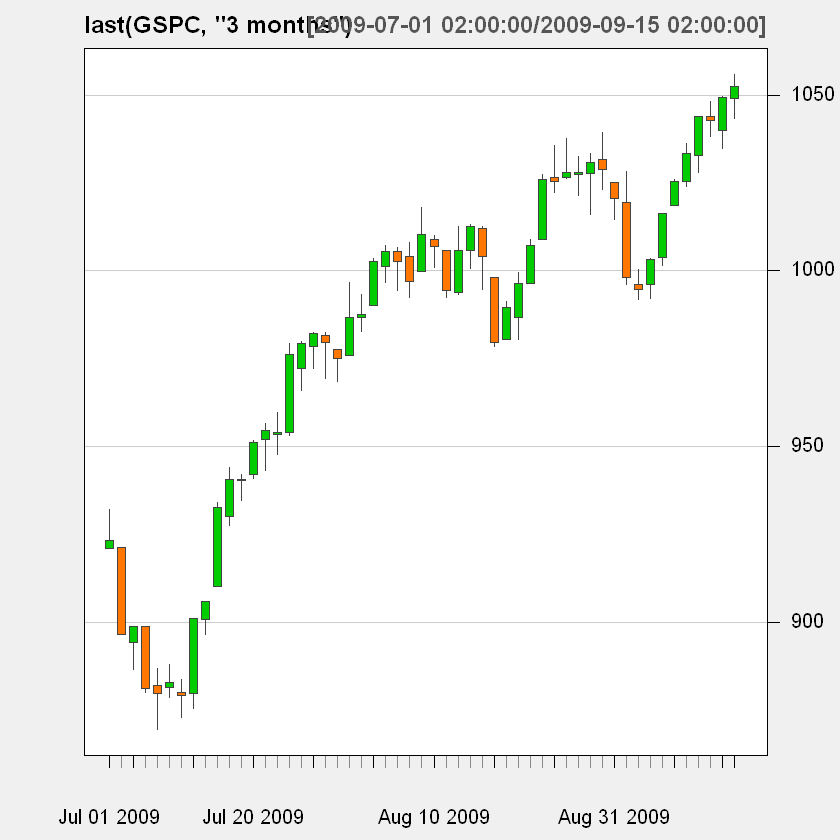

In [17]:
candleChart(last(GSPC, "3 months"), theme = "white", TA = NULL)

In [19]:
avgPrice = function(p) apply(HLC(p), 1, mean)
addAvgPrice = newTA(FUN = avgPrice, col = 1, legend = "AvgPrice")
addT.ind = newTA(FUN = T.ind, col = "red", legend = "tgtRet")

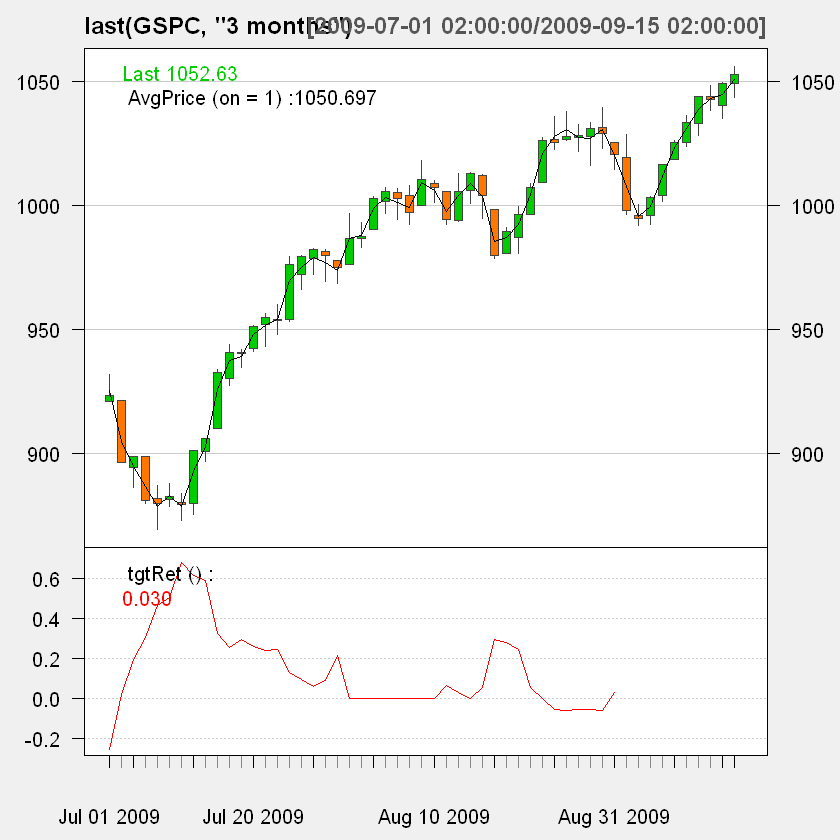

In [22]:
get.current.chob<-function(){quantmod:::get.current.chob()}
candleChart(last(GSPC, "3 months"), theme = "white", TA = "addT.ind();addAvgPrice(on=1)")

In [28]:
candleChart(last(GSPC, "3 months"), theme = "white", TA = "addAvgPrice(on=0)")

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: candleChart(last(GSPC, "3 months"), theme = "white", TA = "addAvgPrice(on=0)")
2: lines(medin(last(GSPC, "3 months"))
  ^


In [43]:
k=10
med_low=rollmedian(xts(GSPC$Low),k=10)
med_high=rollmedian(xts(GSPC$High),k=10)
med_close=rollmedian(xts(GSPC$Close),k=10)


Warning message in runmed(x, k, ...):
"'k' must be odd!  Changing 'k' to 11"Warning message in NextMethod(.Generic):
"number of items to replace is not a multiple of replacement length"Warning message in runmed(x, k, ...):
"'k' must be odd!  Changing 'k' to 11"Warning message in NextMethod(.Generic):
"number of items to replace is not a multiple of replacement length"Warning message in runmed(x, k, ...):
"'k' must be odd!  Changing 'k' to 11"Warning message in NextMethod(.Generic):
"number of items to replace is not a multiple of replacement length"

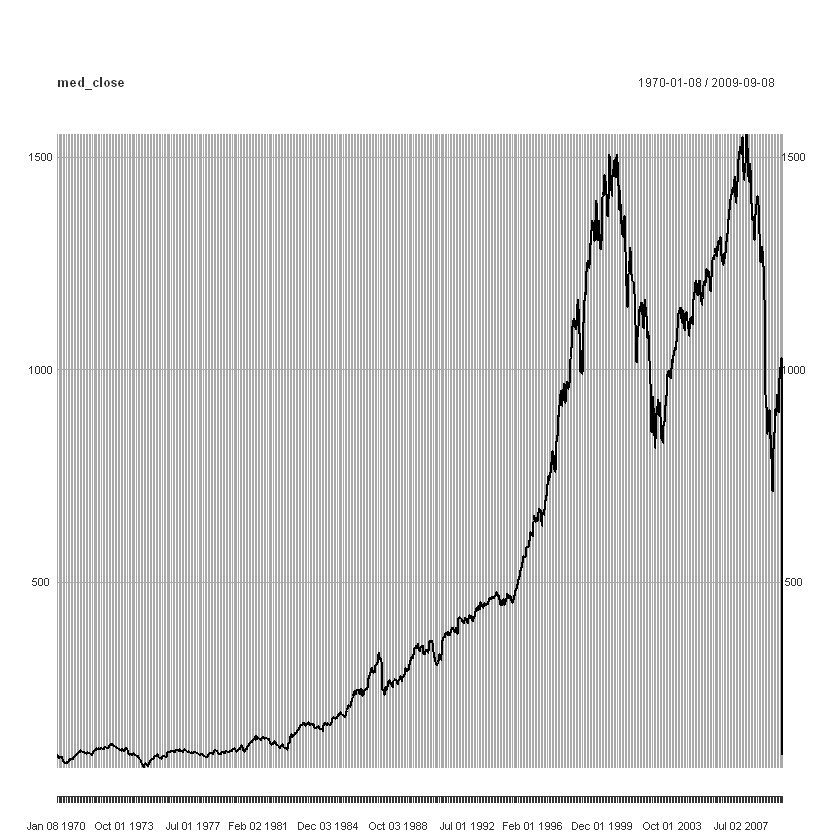

In [50]:
plot(med_close)

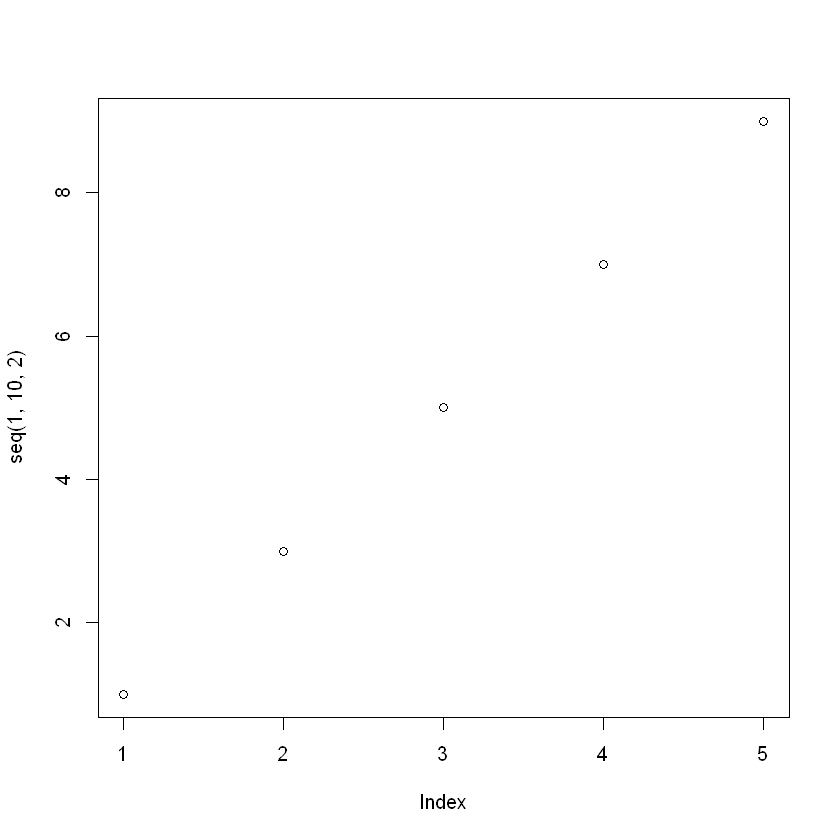